之前介绍的几个模型都是监督学习模型，也就是每个输入数据对应着一个确定的输出标签值，比如波士顿房价里面的房价，泰坦尼克号乘客数据里面的生存状态。有了这些标签数据，我们可以建立起模型进行分类和预测，并且判断最终结果的优劣。

除了监督学习之外，机器学习中还有非监督学习，也就是学习的对象是没有标签的数据，只有特征数据，不能进行分类和预测，但是可以试图找到隐藏的结构，比如进行[聚类](https://en.wikipedia.org/wiki/Cluster_analysis)、降维、密度估计等，下图中是聚类和降维德示意图。
![cluster](pic/clustering.png)

![PCA](pic/PCA.png)

实际上，现有的数据大部分是没有标签的，比如网络社交媒体里面的文本聊天记录、大家网购消费的记录、每天摄像头记录下来的视频等，对这些文本进行标签化成本非常高，所以非监督学习也是非常重要的机器学习内容，特别是在信用卡欺诈检测、客户分类等方面。


本次课程主要介绍聚类的方法，聚类是一个将数据集中在某些方面相似的数据成员进行分类组织的过程，聚类就是一种发现这种内在结构的技术【百度百科】。常用的聚类方法有[K均值](https://en.wikipedia.org/wiki/K-means_clustering)、[混合模型](https://en.wikipedia.org/wiki/Mixture_model)、[层次聚类](https://en.wikipedia.org/wiki/Hierarchical_clustering)。

聚类时需要考虑几个因素：
- 怎样定义目标函数。
- 怎样确定聚类的个数k。
- 怎样划分这k个集合，对于每个样本点来讲有k个选择，如果遍历所有的情况，则复杂度为$k^n$，当k和n很大时，暴力的遍历方法不可取。
- 怎样定义点与点之间的距离，通常我们可以使用欧几里德距离。


## K均值（K-means）

假设观察数据集为n个d维的点$(x_1, x_2, ...,x_n)$，其中$x_i \in R^d$，也就是d维的向量。K均值聚类算法就是要将这n个点分到k（k要小于等于n）个集合中去$(S_1, S_2, ..., S_k)$，使得目标函数最小。目标函数可以定义为类内点对距离平均值之和（引用自《统计学习入门》）：

$$min \ \sum_{i=1}^{k} \sum_{x, \hat x \in S_i} \mid\mid x - \hat x \mid\mid^2$$


其中$N_i$表示第i个集合点的个数。
维基百科上给的目标函数是类内方差之和：

$$min \ \sum_{i=1}^{k} N_i\sum_{x \in S_i} \mid\mid x - \mu_i \mid\mid^2$$

其中，$\mu_i$是第i个集合的平均值：
$$\mu_i = \frac {\sum_{x \in S_i}x}{N_i}, N_i为S_i中样本个数$$



实际上这两个目标函数是等价的，可以证明：

$$\sum_{i=1}^{k} \sum_{x, \hat x \in S_i} \mid\mid x - \hat x \mid\mid^2=2 \sum_{i=1}^{k} N_i\sum_{x \in S_i} \mid\mid x - \mu_i \mid\mid^2$$

实际上
$$\sum_{x, \hat x \in S_i} \mid\mid x - \hat x \mid\mid^2=2N_i\sum_{x \in S_i} \mid\mid x - \mu_i \mid\mid^2$$

具体步骤如下图：


![kmeans_formula](pic/kmeans.jpeg)

K均值聚类的结果与初始类心选择有关。K均值算法能够保证目标函数是下降的，但是可能下降收敛到一个局部最优值。
- 当每个集合里面的点确定后，原来的类心未必是集合点的均值，计算其新的类心，是为了优化$\sum_{x \in S_i} \mid\mid x - \mu_i \mid\mid^2 \leq \sum_{x \in S_i} \mid\mid x - \mu_{old} \mid\mid^2$
- 根据新的类心，按照最近距离给周边样本点重新分类，是为了整体上优化目标函数:
$$\sum_{i=1}^{k} N_i\sum_{x \in S_i} \mid\mid x - \mu_i \mid\mid^2$$
假设第i类某点里第j类类心更近：
$$\mid\mid x - \mu_i \mid\mid^2  \geq \mid\mid x - \mu_j \mid\mid^2$$
我们重现划分类别，相当于将目标函数里面该点对应的距离平方$\mid\mid x - \mu_i \mid\mid^2$更新为$\mid\mid x - \mu_j \mid\mid^2$。


下面举个列子来应用算法进行分类

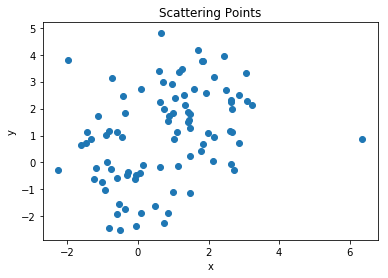

In [75]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
np.random.seed(3)
points1 = np.random.randn(30, 2)
points2 = np.random.randn(30, 2) + 2
points3 = 2*np.random.randn(30, 2) + 1
points = np.vstack([points1, points2, points3])

plt.scatter(points[:, 0], points[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scattering Points')

[[-0.40232665 -0.58152893]
 [ 2.37835525  1.32941351]
 [ 0.83867217  2.82134435]]


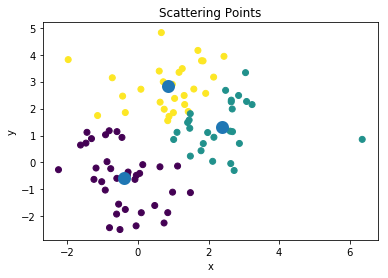

In [81]:
#训练K均值
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(points)
centers = km.cluster_centers_
print(centers)
plt.scatter(points[:, 0], points[:, 1], c=km.labels_.astype(np.float))
plt.scatter(centers[:, 0], centers[:, 1], marker='o',linewidths=7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scattering Points')

##  层次聚类法

上面的k均值聚类中，需要事先指定聚类数量。有的学者就想提出一种新的聚类算法，不需要指定聚类数量，而是根据实际需要灵活地进行划分，当条件很苛刻时，类的数量比较多，当条件比较宽松时，类的数量就少。

![hierachicalClustering](pic/hierarchical.jpg)

### 两种聚类
层次聚类方法对给定的数据集进行层次的分解，直到某种条件满足为止。具体又可分为凝聚的，分裂的两种方案【百度百科】。
- 凝聚的层次聚类是一种自底向上的策略，首先将每个对象作为一个簇，然后合并这些原子簇为越来越大的簇，直到所有的对象都在一个簇中，或者某个终结条件被满足，绝大多数层次聚类方法属于这一类，它们只是在簇间相似度的定义上有所不同。

- 分裂的层次聚类与凝聚的层次聚类相反，采用自顶向下的策略，它首先将所有对象置于同一个簇中，然后逐渐细分为越来越小的簇，直到每个对象自成一簇，或者达到了某个终止条件。

### 聚类的流程
- 1.将每个对象归为一类, 共得到n类, 每类仅包含一个对象. 类与类之间的距离就是它们所包含的对象之间的距离，总共n  = n(n − 1)/2距离对。
- 2.找到最接近的两个类并合并成一类, 新类的高度就是原来两个类之间的距离，于是总的类数少了一个。
- 3.重新计算新的类与所有旧类之间的距离。
- 4.重复第2步和第3步, 直到最后合并成一个类为止(此类包含了N个对象)。

![hierachical](pic/ hierarchical2.png)

### 类间距离的定义
- SL聚类，即single-linkage聚类法，类间距离等于两类对象之间的最小距离，若用相似度衡量，则是各类中的任一对象与另一类中任一对象的最大相似度。
- CL层次聚类，即complete-linkage聚类法(也称diameter 或maximum 方法)，组间距离等于两组对象之间的最大距离。
- AL层次聚类，即average-linkage聚类法组间距离等于两组对象之间的平均距离。

In [77]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=3)
ag.fit(points)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=3,
            pooling_func=<function mean at 0x1069e60d0>)

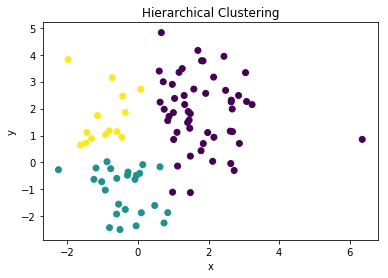

In [78]:
plt.scatter(points[:, 0], points[:, 1], c=ag.labels_.astype(np.float))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hierarchical Clustering')

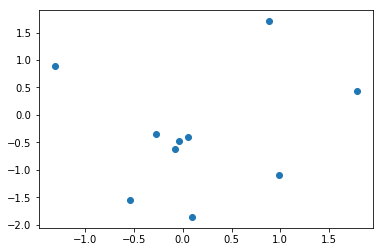

In [79]:
plt.scatter(points[:10, 0], points[:10, 1])

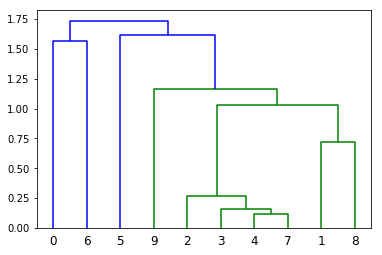

In [80]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(points[:10])
data = dendrogram(Z)

## 高斯混合模型

上面我们谈到了用 k-means 进行聚类的方法，这次我们来说一下另一个很流行的算法：Gaussian Mixture Model (GMM)。事实上，GMM 和 k-means 很像，不过 GMM 是学习出一些概率密度函数来（所以 GMM 除了用在 clustering 上之外，还经常被用于 density estimation ），简单地说，k-means 的结果是每个数据点被 assign 到其中某一个 cluster 了，而 GMM 则给出这些数据点被 assign 到每个 cluster 的概率，又称作 soft assignment (引用自CSDN[博客](http://blog.csdn.net/sunanger_wang/article/details/8852746))。

得出一个概率有很多好处，因为它的信息量比简单的一个结果要多，比如，我可以把这个概率转换为一个 score ，表示算法对自己得出的这个结果的把握。也许我可以对同一个任务，用多个方法得到结果，最后选取“把握”最大的那个结果；另一个很常见的方法是在诸如疾病诊断之类的场所，机器对于那些很容易分辨的情况（患病或者不患病的概率很高）可以自动区分，而对于那种很难分辨的情况，比如，49% 的概率患病，51% 的概率正常，如果仅仅简单地使用 50% 的阈值将患者诊断为“正常”的话，风险是非常大的，因此，在机器对自己的结果把握很小的情况下，会“拒绝发表评论”，而把这个任务留给有经验的医生去解决。

顾名思义，Gaussian Mixture Model ，就是假设数据服从 Mixture Gaussian Distribution ，换句话说，数据可以看作是从数个 Gaussian Distribution 中生成出来的。实际上，我们在 K-means 和用到的那个例子就是由三个 Gaussian 分布从随机选取出来的。实际上，从中心极限定理可以看出，Gaussian 分布（也叫做正态 (Normal) 分布）这个假设其实是比较合理的，除此之外，Gaussian 分布在计算上也有一些很好的性质，所以，虽然我们可以用不同的分布来随意地构造 XX Mixture Model ，但是还是 GMM 最为流行。

每个 GMM 由 K 个 Gaussian 分布组成，每个 Gaussian 称为一个“Component”，这些 Component 线性加成在一起就组成了 GMM 的概率密度函数：
$$p(x) = \sum_{k=1}^{K}p(k)p(x \mid k) = \sum_{k=1}^{K}p(k)p(x \mid \mu_k, \sigma_k)$$
$$p(x) =\sum_{k=1}^{K} \pi_k N(x \mid \mu_k, \sigma_k)$$

根据上面的式子，如果我们要从 GMM 的分布中随机地取一个点的话，实际上可以分为两步：首先随机地在这 K 个 Component 之中选一个，每个 Component 被选中的概率实际上就是它的系数 $\pi_k$ ，选中了 Component 之后，再单独地考虑从这个 Component 的分布中选取一个点就可以了──这里已经回到了普通的 Gaussian 分布，转化为了已知的问题。

那么如何用 GMM 来做 clustering 呢？其实很简单，现在我们有了数据，假定它们是由 GMM 生成出来的，那么我们只要根据数据推出 GMM 的概率分布来就可以了，然后 GMM 的 K 个 Component 实际上就对应了 K 个 cluster 了。根据数据来推算概率密度通常被称作 density estimation ，特别地，当我们在已知（或假定）了概率密度函数的形式，而要估计其中的参数的过程被称作“参数估计”。

现在假设我们有 N 个数据点，并假设它们服从某个分布（记作 p(x) ），现在要确定里面的一些参数的值，例如，在 GMM 中，我们就需要确定 $\pi_k、\mu_k 和 \Sigma_k$ 这些参数。 我们的想法是，找到这样一组参数，它所确定的概率分布生成这些给定的数据点的概率最大，而这个概率实际上就等于 $\prod_{i=1}^N p(x_i) $，我们把这个乘积称作似然函数 (Likelihood Function)，取对数后似然函数表达如下：

$$
\displaystyle
\sum_{i=1}^N \log \left\{\sum_{k=1}^K \pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k)\right\}
$$

这个函数表达式比较复杂，难以之间进行求导求解。为了解决这个问题，我们采取之前从 GMM 中随机选点的办法：分成两步，实际上也就类似于 K-means 的两步。估计数据由每个 Component 生成的概率（并不是每个 Component 被选中的概率）：
- 1.对于每个数据 $x_i$ 来说，它由第 k 个 Component 生成的概率为
$$\displaystyle
\gamma(i, k) = \frac{\pi_k \mathcal{N}(x_i|\mu_k, \Sigma_k)}{\sum_{j=1}^K \pi_j\mathcal{N}(x_i|\mu_j, \Sigma_j)}$$
由于式子里的 $\mu_k $和 $\Sigma_k$ 也是需要我们估计的值，我们采用迭代法，在计算 $\gamma(i, k) $的时候我们假定 $\mu_k $和 $\Sigma_k$ 均已知，我们将取上一次迭代所得的值（或者初始值）。在k均值算法中，$\gamma(i, k)$取值范围就是0和1，分配到某类则是1，其他为0。


- 2.估计每个 Component 的参数：现在我们假设上一步中得到的 $\gamma(i, k) $就是正确的“数据 $x_i$ 由 Component k 生成的概率”，亦可以当做该 Component 在生成这个数据上所做的贡献，或者说，我们可以看作 $x_i$ 这个值其中有 $\gamma(i, k)x_i $这部分是由 Component k 所生成的。集中考虑所有的数据点，现在实际上可以看作 Component 生成了 $\gamma(1, k)x_1, \ldots, \gamma(N, k)x_N $这些点。由于每个 Component 都是一个标准的 Gaussian 分布，可以很容易分布求出最大似然所对应的参数值：
$$\displaystyle
\begin{aligned}
\mu_k & = \frac{1}{N_k}\sum_{i=1}^N\gamma(i, k)x_i \\
\Sigma_k & = \frac{1}{N_k}\sum_{i=1}^N\gamma(i,
k)(x_i-\mu_k)(x_i-\mu_k)^T
\end{aligned}$$
其中 $N_k = \sum_{i=1}^N \gamma(i, k) $，并且 $\pi_k $也顺理成章地可以估计为$ N_k/N$ 。

- 3.重复迭代前面两步，直到似然函数的值收敛为止。

这个算法其实就是传说中的EM(Expectation Maximization)算法。具体可以参考 [CSDN](http://www.cnblogs.com/jerrylead/archive/2011/04/06/2006936.html)。

In [83]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(points)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

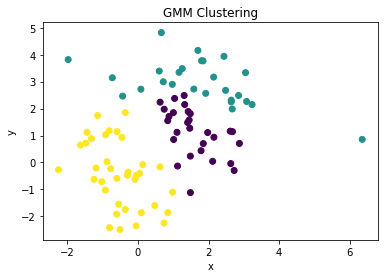

In [96]:
plt.scatter(points[:, 0], points[:, 1], c=gmm.predict(points).astype(np.float))
plt.xlabel('x')
plt.ylabel('y')
plt.title('GMM Clustering')

In [91]:
import itertools
import matplotlib as mpl
from scipy import linalg
color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


In [92]:
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

In [94]:
gmm.predict(points)

array([0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 2, 1, 0, 0, 1,
       2, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1])

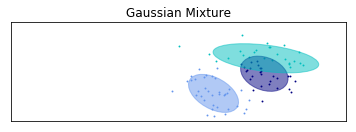

In [93]:
plot_results(points, gmm.predict(points), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

# 参考资料

- 百度百科，http://baike.baidu.com/link?url=lnnkUw_W1tjcUA5NO_mDhuV62a73GJN7r-7kl4njSktSaZ68dytgm6Z1LibN7rKuTBVohgYyvRwZo51qM666nugAQXOQ3b4A4nsikebm_jVn4mp2H2Uo0bPcVAQ3cxv6i0R4P9CWhU-gCBiP_ovKwCZJUW-9_1_CnrIGj6GphcG

- 维基百科，https://en.wikipedia.org/wiki/Cluster_analysis

- 维基百科，https://en.wikipedia.org/wiki/Mixture_model

- 维基百科，https://en.wikipedia.org/wiki/Hierarchical_clustering
- 层次聚类法，百度百科http://baike.baidu.com/link?url=RlWWtgvfOB5zSNfjVl8H89z13c_FW_6YA3pdCXbHLnsj-ICUIP7tBOQtyhjfuFKPmOvHMTrLFDT5JuE2TlbI1lGOLAz10JkEeyvmzt3MdN0_o4WI7BBbkntUWZsGD9TxWhjVb9h1gPBNai9GmHoPvq
-  高斯混合模型，http://blog.csdn.net/sunanger_wang/article/details/8852746